In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("./housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
def remove_spaces(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    string_columns = list(df.dtypes[df.dtypes == 'object'].index)

    for col in string_columns:
        df[col] = df[col].str.lower().str.replace(' ', '_')
    return df

In [6]:
df = remove_spaces(df)

EDA

In [12]:
(df.isnull().sum()/df.shape[0])*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

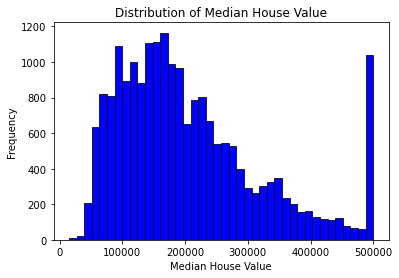

In [14]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, color='blue', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Median House Value')
plt.title('Distribution of Median House Value')

plt.show()

In [15]:
columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

In [17]:
df = df[columns]

Question 1: Number of missing values

In [100]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Question 2: Median for population

In [101]:
df.population.median()

1166.0

In [21]:
SEED = 42

In [22]:
np.random.seed(SEED)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [23]:
idx = np.arange(n)
np.random.shuffle(idx)

In [24]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train.reset_index(drop = True, inplace = True)
df_val.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [25]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [26]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:] #bias and parameters

In [68]:
def prepare_X(df, fill_na = 0):
    df = df.fillna(fill_na)
    X = df.values
    return X

In [57]:
def rmse(y_pred, y):
    return np.round(np.sqrt(np.mean((y_pred - y) ** 2)), 2)

Question 3: Best way to fill NAs

In [102]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [103]:
train_preds = w_0 + X_train.dot(w)
rmse(train_preds, y_train)

0.34

In [104]:
val_preds = w_0 + prepare_X(df_val).dot(w)
rmse(val_preds, y_val)

0.33

In [105]:
fill_mean = np.mean(df_train, axis = 0)
fill_mean

latitude                35.610346
longitude             -119.555670
housing_median_age      28.699855
total_rooms           2619.001453
total_bedrooms         533.480332
population            1413.292151
households             495.653666
median_income            3.871533
dtype: float64

In [106]:
X_train = prepare_X(df_train, fill_mean)
w_0, w = train_linear_regression(X_train, y_train)

In [107]:
train_preds = w_0 + X_train.dot(w)
rmse(train_preds, y_train)

0.34

In [108]:
val_preds = w_0 + prepare_X(df_val, fill_mean).dot(w)
rmse(val_preds, y_val)

0.33

## Regularized

Question 4: Best regularization parameter r

In [69]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [109]:
X_train = prepare_X(df_train)
scores = {}
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    print("R: ", r)
    w_0, w = train_linear_regression_reg(X_train, y_train, r)

    y_pred = w_0 + X_train.dot(w)
    print('train:', rmse(y_train, y_pred))

    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    print('validation:', rmse(y_val, y_pred))

    scores[r] = rmse(y_val, y_pred)

R:  0
train: 0.34
validation: 0.33
R:  1e-06
train: 0.34
validation: 0.33
R:  0.0001
train: 0.34
validation: 0.33
R:  0.001
train: 0.34
validation: 0.33
R:  0.01
train: 0.34
validation: 0.33
R:  0.1
train: 0.34
validation: 0.33
R:  1
train: 0.35
validation: 0.33
R:  5
train: 0.35
validation: 0.34
R:  10
train: 0.35
validation: 0.34


In [113]:
sorted(scores)

[0, 1e-06, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

SEED Effect

Question 5: STD of RMSE scores for different seeds

In [71]:
def get_model_score(seed = SEED):
    np.random.seed(seed)
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    df_train.reset_index(drop = True, inplace = True)
    df_val.reset_index(drop = True, inplace = True)
    df_test.reset_index(drop = True, inplace = True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = prepare_X(df_train)
    w_0, w = train_linear_regression(X_train, y_train)  

    val_preds = w_0 + prepare_X(df_val).dot(w)
    rmse_score = rmse(val_preds, y_val)
    print(f"Score for seed:{seed} is rmse: {rmse_score}")
    return rmse_score

In [72]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    scores.append(get_model_score(seed))

Score for seed:0 is rmse: 0.34
Score for seed:1 is rmse: 0.34
Score for seed:2 is rmse: 0.33
Score for seed:3 is rmse: 0.34
Score for seed:4 is rmse: 0.34
Score for seed:5 is rmse: 0.34
Score for seed:6 is rmse: 0.35
Score for seed:7 is rmse: 0.34
Score for seed:8 is rmse: 0.35
Score for seed:9 is rmse: 0.34


In [74]:
print(round(np.std(scores), 3))

0.005


Question 6: RMSE on test

In [114]:
def get_model_score_test(seed = SEED):
    np.random.seed(seed)
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    df_train.reset_index(drop = True, inplace = True)
    df_val.reset_index(drop = True, inplace = True)
    df_test.reset_index(drop = True, inplace = True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    # combine train and val
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    X_train = np.concatenate([X_train, X_val])
    y_train = np.concatenate([y_train, y_val])

    w_0, w = train_linear_regression_reg(X_train, y_train, 0.001)  

    test_preds = w_0 + prepare_X(df_test).dot(w)
    rmse_score = rmse(test_preds, y_test)
    print(f"Score for seed:{seed} is rmse: {rmse_score}")
    return rmse_score

In [115]:
get_model_score_test(9)

Score for seed:9 is rmse: 0.35


0.35